<a href="https://colab.research.google.com/github/AdityaShyamsundar/EDA---Airbnb-Bookings/blob/main/Aditya_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Projects/EDA Airbnb Bookings Analysis/Airbnb NYC 2019.csv',encoding ='latin')

In [4]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Dataset Description
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.head(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [7]:
df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
# Shape of Dataframe
df.shape

(48895, 16)

In [10]:
df[:5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
# Counts of room type
room_booked = df.room_type.value_counts()
room_booked

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0.5, 0, 'ROOM TYPE')

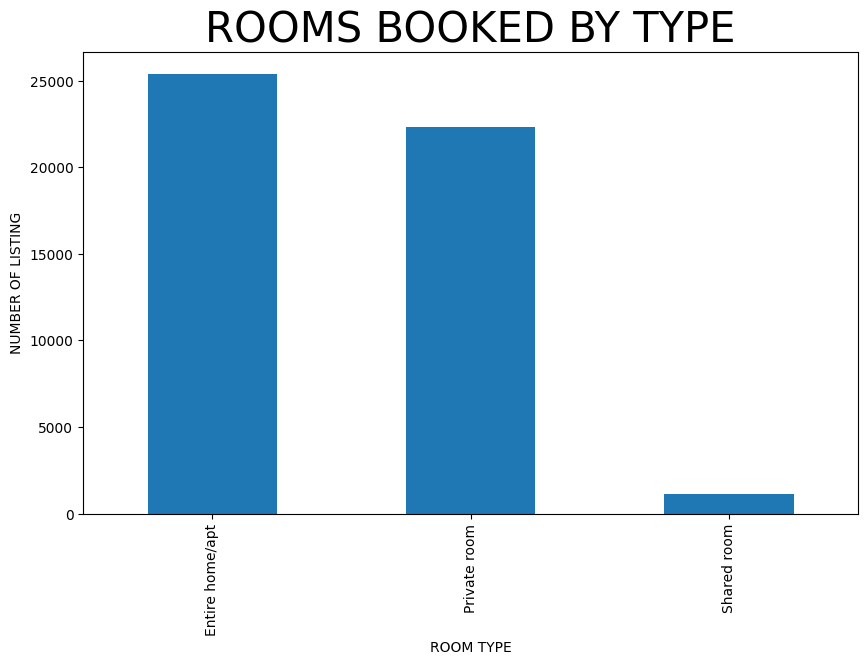

In [12]:
# Visualising most listed Room types
plt.figure(figsize=(10,6))
room_booked.plot(kind='bar')
plt.title('ROOMS BOOKED BY TYPE',{'fontsize':30})
plt.ylabel('NUMBER OF LISTING')
plt.xlabel('ROOM TYPE')

In [13]:
# Checking for the null values
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# Filling blank cells
df.fillna({'name': 'Absent'},inplace=True)
df.fillna({'host_name': 'Absent'},inplace=True)
df.fillna({'reviews_per_month': 0},inplace=True)

In [15]:
# Removing unnecessory columns
df = df.drop(['last_review'], axis =1)

In [16]:
# Checking for the null values again
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
df[:5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# What can we learn about different hosts and areas?

###  Exploring Hosts and their Neighbourhood Group

In [18]:
# Value count of neighbourhood group
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [19]:
# Most calculated host listing and their neighbourhood.
host_area = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_area.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(10)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7482,Kazuya,Brooklyn,103
7484,Kazuya,Queens,103
7483,Kazuya,Manhattan,103
13220,Sonder,Manhattan,96
6544,Jeremy & Laura,Manhattan,96
2905,Corporate Housing,Manhattan,91


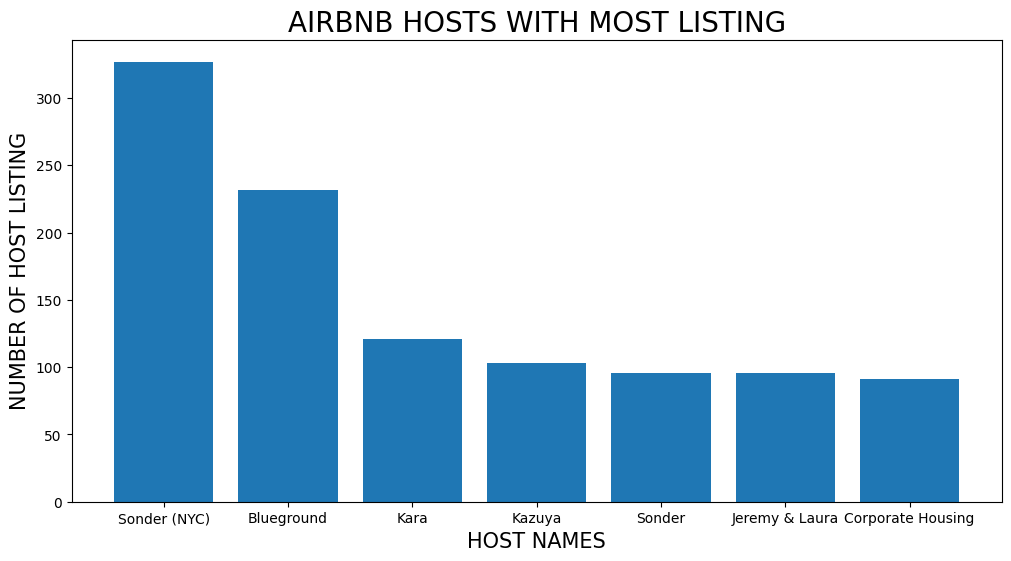

In [20]:
# Visualising Airbnb Hosts with most listings
plt.figure(figsize=(12,6))
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('AIRBNB HOSTS WITH MOST LISTING',{'fontsize':20})
plt.xlabel('HOST NAMES',{'fontsize':15})
plt.ylabel('NUMBER OF HOST LISTING',{'fontsize':15})
plt.show()

### **We can See here top 5 hosts are from Manhattan and Brooklyn.**

# What can we learn from predictions? (ex: locations, prices, reviews, etc)

### Exploring Location

In [21]:
# Count of Airbnb in each neighbourhood
airbnb_count = df.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by='count', ascending = False)
print(airbnb_count)

  neighbourhood_group  count
2           Manhattan  21661
1            Brooklyn  20104
3              Queens   5666
0               Bronx   1091
4       Staten Island    373


Text(0.5, 0, 'Neighbourhood Group')

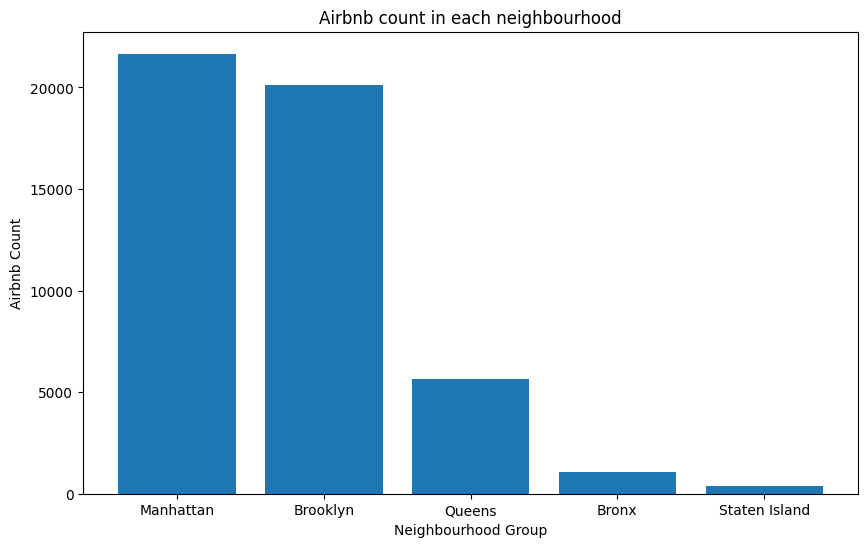

In [22]:
# Bar chart for Airbnb count in each neighbourhood
plt.figure(figsize=(10,6))
neighbourhood_group = airbnb_count['neighbourhood_group']
neighbourhood_lisitng = airbnb_count['count']
plt.bar(neighbourhood_group,neighbourhood_lisitng)
plt.title('Airbnb count in each neighbourhood')
plt.ylabel('Airbnb Count')
plt.xlabel('Neighbourhood Group')

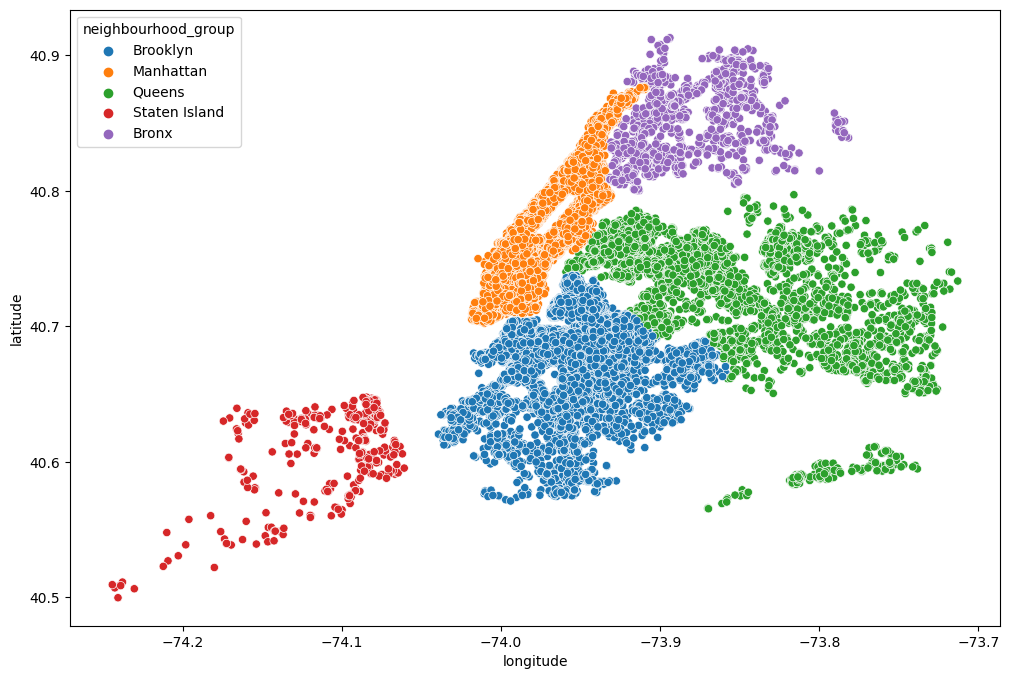

In [23]:
# Airbnbs in neighbourhood
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

In [24]:
# Review count in neighbourhood
neighbour_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
print(neighbour_reviews)

  neighbourhood_group  number_of_reviews
3              Queens                629
2           Manhattan                607
1            Brooklyn                488
4       Staten Island                333
0               Bronx                321


Text(0.5, 0, 'Neighbourhood Group')

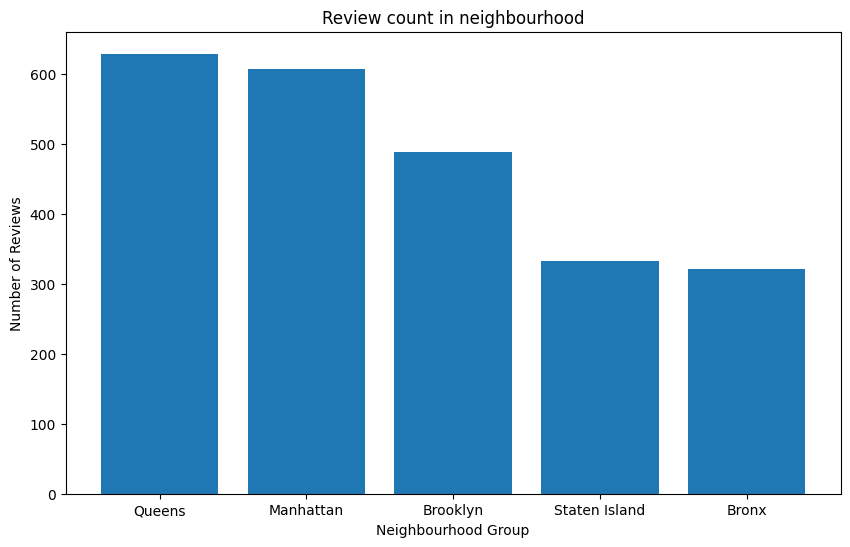

In [25]:
plt.figure(figsize=(10,6))
neighbourhood_group = neighbour_reviews['neighbourhood_group']
number_of_reviews = neighbour_reviews['number_of_reviews']
plt.bar(neighbourhood_group,number_of_reviews)
plt.title('Review count in neighbourhood')
plt.ylabel('Number of Reviews')
plt.xlabel('Neighbourhood Group')

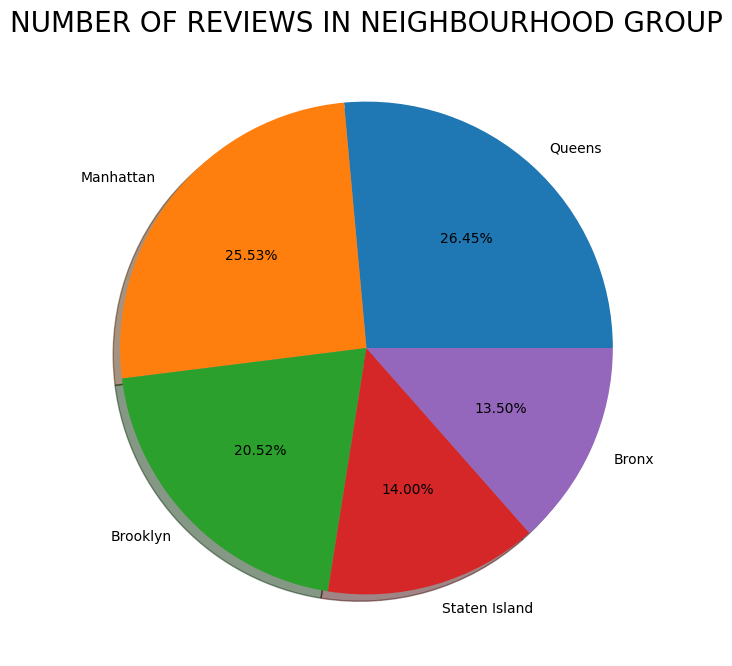

In [26]:
# Visualising the number of reviews in each neighbourhood group through pie chart
plt.rcParams['figure.figsize'] = (12,8)
reviews = neighbour_reviews['number_of_reviews']
plt.pie(reviews, labels = neighbour_reviews['neighbourhood_group'], autopct ='%0.2f%%', shadow=True)
plt.title('NUMBER OF REVIEWS IN NEIGHBOURHOOD GROUP', {'fontsize': 20})
plt.show()

### **Even though Manhatten having most listings Queens has the most reviews**

### Exploring Price

In [27]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

##### After analysing the price we found out that the minimum price is 0 which is not possible and maximum price is 10000 which seems too expensive.

Text(0.5, 0, 'PRICE')

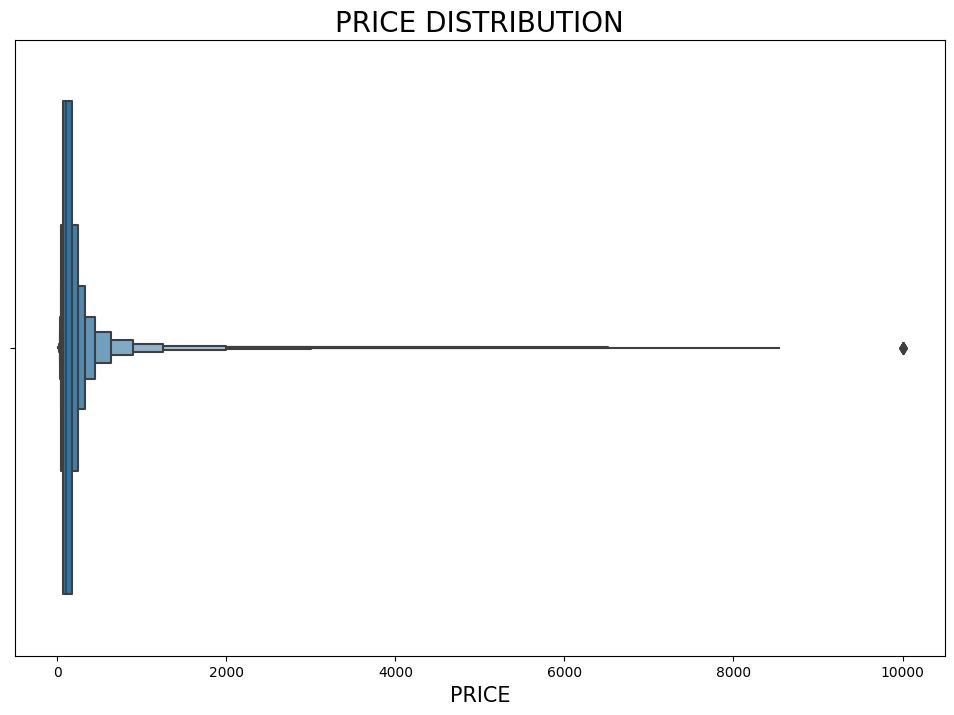

In [28]:
# Using boxenplot of the price
figsize=(12,8)
sns.boxenplot(x = 'price',data=df)
plt.title('PRICE DISTRIBUTION',{'fontsize':20})
plt.xlabel('PRICE',{'fontsize':15})

#### There are outliers in the price of dataset.

#### Using the quantile based flooring and capping to find out possible lowest and highest prices

In [29]:
# Low Quantile
low_q = df['price'].quantile(0.05)
low_q

40.0

In [30]:
# High Quantile
high_q = df['price'].quantile(0.95)
high_q

355.0

#### After using the quantile based flooring and capping we found 5th percentile of the price is 40 and 95th percentile of the price is 355, which seems possible lowest and highest prices respectively.

### Removing the outliers

In [31]:
#removing the values below 5th percentile and above 95th percentile
new_df = df.drop(df[df['price']<low_q].index)
new_df = df.drop(df[df['price']>high_q].index)

Text(0.5, 0, 'PRICE')

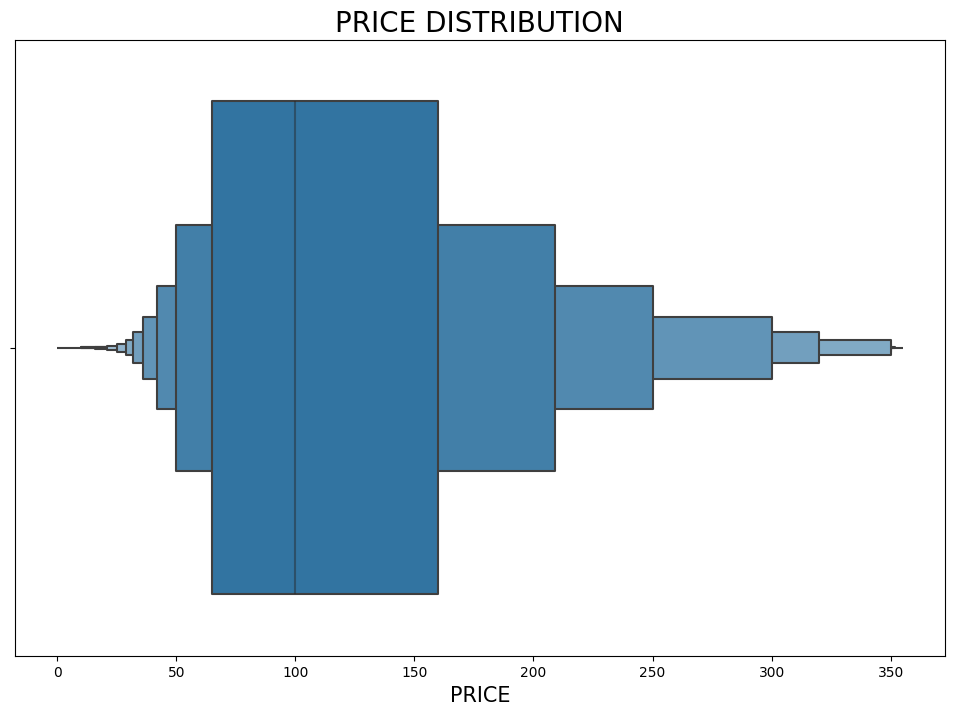

In [32]:
# Using boxenplot of the price again
figsize=(12,8)
sns.boxenplot(x = 'price',data = new_df)
plt.title('PRICE DISTRIBUTION',{'fontsize':20})
plt.xlabel('PRICE',{'fontsize':15})

# Which hosts are the busiest and why?

In [33]:
# Considering th Busiest hosts who has maximum number of reviews
busiest_hosts = new_df.groupby(['host_name','host_id','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
9839,Dona,47621202,Private room,Queens,629
16954,Jj,4734398,Private room,Manhattan,607
24482,Maya,37312959,Private room,Queens,543
5981,Carol,2369681,Private room,Manhattan,540
8572,Danielle,26432133,Private room,Queens,510
3778,Asa,12949460,Entire home/apt,Brooklyn,488
36109,Wanda,792159,Private room,Brooklyn,480
21544,Linda,2680820,Private room,Queens,474
8262,Dani,42273,Entire home/apt,Brooklyn,467
2809,Angela,23591164,Private room,Queens,466


### **Top 5 hosts are hosting Private rooms.**

Text(0.5, 0, 'HOST NAMES')

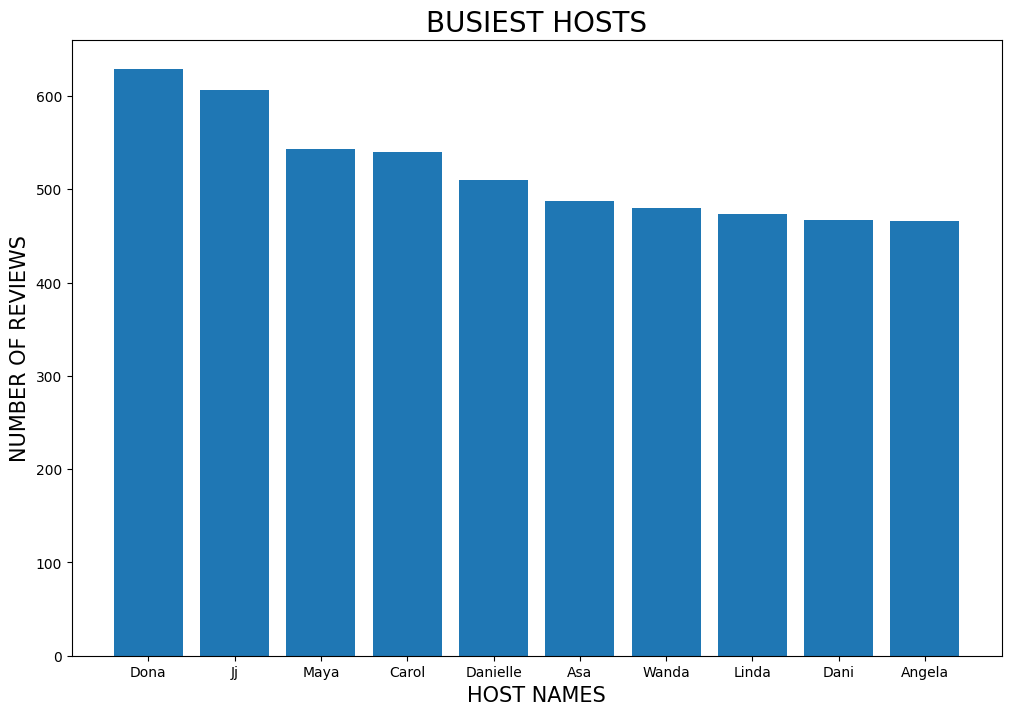

In [34]:
# Visualising Busiest Hosts
plt.figure(figsize=(12,8))
host_name = busiest_hosts['host_name']
number_of_reviews = busiest_hosts['number_of_reviews']
plt.bar(host_name,number_of_reviews)
plt.title('BUSIEST HOSTS',{'fontsize':20})
plt.ylabel('NUMBER OF REVIEWS',{'fontsize':15})
plt.xlabel('HOST NAMES',{'fontsize':15})

In [35]:
# Top 5 Hosts
busiest_hosts['host_name'][:5]

9839         Dona
16954          Jj
24482        Maya
5981        Carol
8572     Danielle
Name: host_name, dtype: object

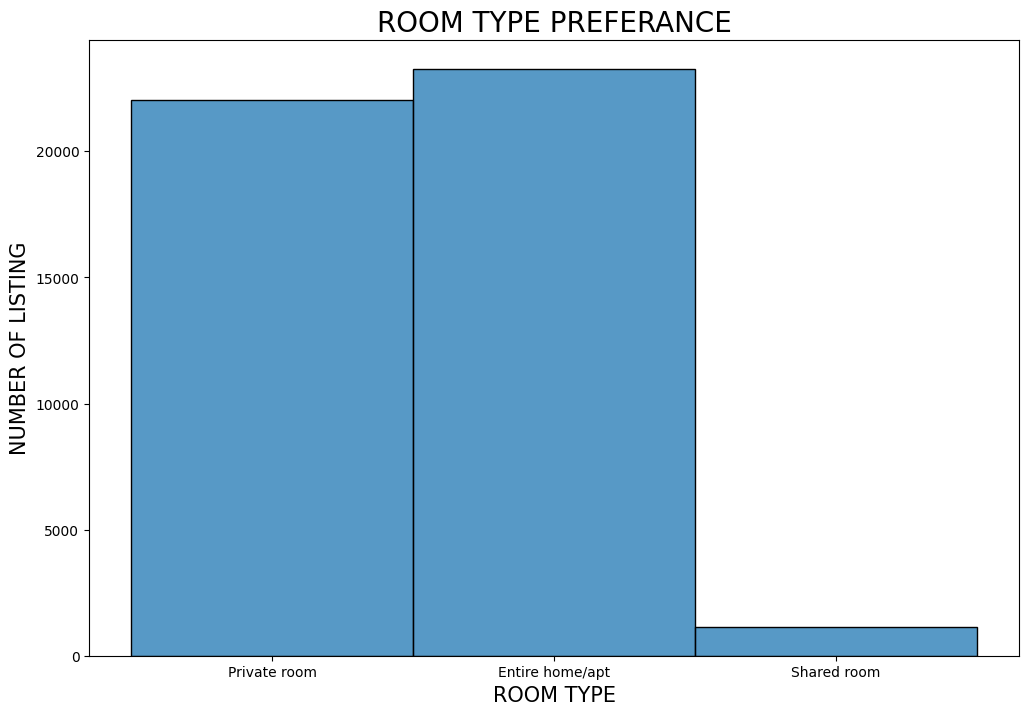

In [36]:
# Plotting histogram for room types to look for which are most preferred room types.
plt.figure(figsize=(12,8))
hp = sns.histplot(new_df['room_type'])
plt.title('ROOM TYPE PREFERANCE', {'fontsize':20})
plt.xlabel('ROOM TYPE',{'fontsize':15}) 
plt.ylabel('NUMBER OF LISTING', {'fontsize':15})
plt.show()

#### As we can see in the above chart over all Entire home/apt is the most preffered room type. But the top 5 hosts are hosting the Privet rooms and performing best in the hosts list.

# Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [37]:
# Busiest Areas room booking with minimum nights
busiest_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
busiest_areas = busiest_areas.sort_values(by='minimum_nights', ascending=False)
busiest_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,11615
4,Brooklyn,Private room,10071
3,Brooklyn,Entire home/apt,9079
7,Manhattan,Private room,7785
10,Queens,Private room,3355
9,Queens,Entire home/apt,2037
1,Bronx,Private room,648
8,Manhattan,Shared room,469
5,Brooklyn,Shared room,411
0,Bronx,Entire home/apt,366


### **Top 5 locations are Manhattan. Brooklyn, Queens, Bronx and Staten Island. It seems these are popular tourist destinations.**

Text(0.5, 0, 'ROOM TYPE')

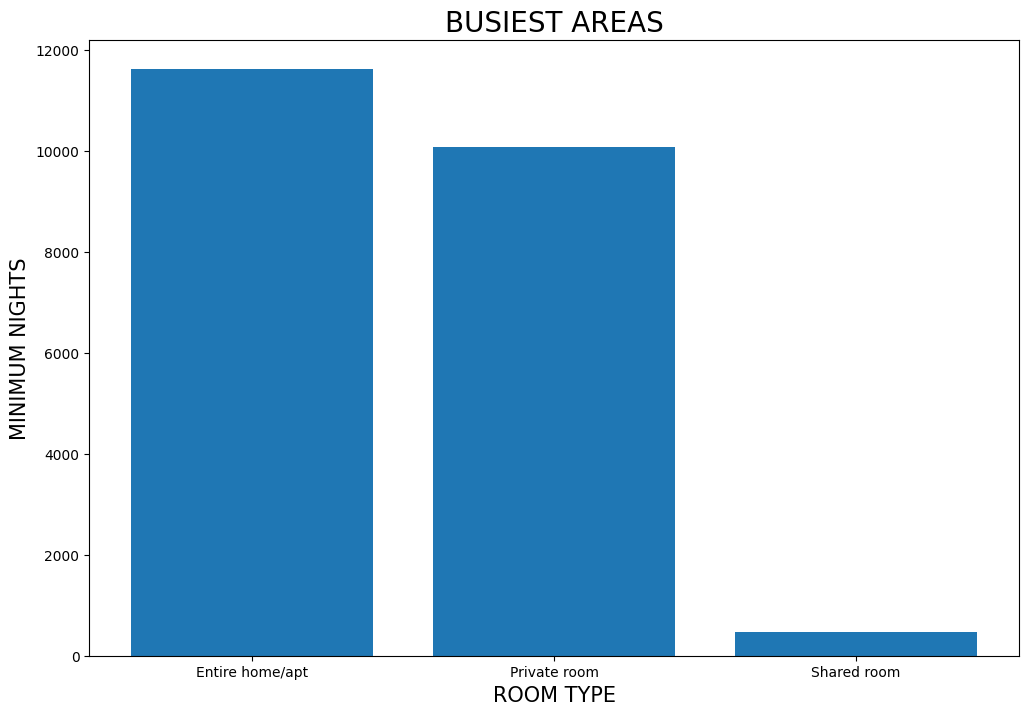

In [38]:
room_type = busiest_areas['room_type']
minimum_nights = busiest_areas['minimum_nights']

# Visualizing Busiest Areas with Bar chart
plt.figure(figsize=(12,8))
plt.bar(room_type,minimum_nights)
plt.title('BUSIEST AREAS',{'fontsize':20})
plt.ylabel('MINIMUM NIGHTS',{'fontsize':15})
plt.xlabel('ROOM TYPE',{'fontsize':15})

# Conclusion

Based on the analysis conducted, the following observations can be made:

* Individuals who choose to stay in entire homes or apartments tend to stay for a longer duration within the specific neighborhood.

* In contrast, those who prefer private rooms have shorter stays compared to those who opt for entire homes or apartments.

* A majority of people prioritize accommodations with lower prices.

* A higher number of reviews for a particular neighborhood group indicates that the location is likely a popular tourist destination.

* If individuals are not staying for more than one night, it suggests that they are likely travelers rather than long-term guests.